### 1. ACQUISITION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('./googleplaystore.csv')

## 2. WRANGLING

In [4]:

data = data.drop_duplicates()
data.drop_duplicates('App', keep="last", inplace=True)
data=data.rename(columns={'Price':'Price_dollars','Content Rating':'Content_Rating', 'Last Updated':'Last_Updated','Current Ver':'Current_Ver','Android Ver':'Android_Ver'})
data=data.drop('Genres', axis=1)
new = data['Last_Updated'].str.split(",", n = 1, expand = True)
data['Updating_Year']=new[1]
data=data.drop('Last_Updated', axis=1)
data['Installs']=data['Installs'].str.replace("+","")
data['Android_Ver']=data['Android_Ver'].str.replace(" and up","")
data['Price_dollars']=data['Price_dollars'].str.replace("$","")
data=data.drop(data[data['Reviews']=='3.0M'].index)
data.loc[:,'Installs'] = data.loc[:,'Installs'].str.replace(',', '', regex=False).astype(int)
data['Reviews']=data['Reviews'].astype(int)
data['Updating_Year']=data['Updating_Year'].astype(int)
data['Price_dollars']=data['Price_dollars'].astype(float)



## 3. ANALYSIS

In [5]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price_dollars,Content_Rating,Current_Ver,Android_Ver,Updating_Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,1.0.0,4.0.3,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,1.2.4,4.0.3,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Varies with device,4.2,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,1.1,4.4,2018
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,1.0,2.3,2017


### H1: las aplicaciones gratis son las que tienen más reviews y un mayor número de instalaciones 

In [6]:
H1=pd.pivot_table(data,values=['Reviews','Installs'], index='Type',aggfunc={'Reviews':'mean', 'Installs':'mean'})
H1

,Installs,Reviews
Type,,
Free,8.448144e+06,234278.113994
Paid,7.607929e+04,8746.374005


### H2: las apps de comunicación y juegos son las que más se instalan

In [7]:
H2=pd.pivot_table(data,values=['Installs'], index='Category',aggfunc='sum')
H2=H2.sort_values(by='Installs', ascending=False)
H2.head(2)

,Installs
Category,
COMMUNICATION,11039276251
GAME,10897924415


### H3: las apps con actualizaciones recientes son las que más se instalan. No concluyente

In [14]:
correlation=data['Installs'].corr(data['Updating_Year'])
correlation

0.06883307424883546

### H4: Instagram, Whatsapp y Fb. Top 3 apps gratis mejores valoradas > 5m de reviews 

In [15]:
H4=data[(data['Reviews']>50000000)&(data['Type']=='Free')].sort_values(by='Rating', ascending=False).head(3)
H4

,App,Category,Rating,Reviews,Size,Installs,Type,Price_dollars,Content_Rating,Current_Ver,Android_Ver,Updating_Year,binned
3909,Instagram,SOCIAL,4.5,66509917,Varies with device,1000000000,Free,0.0,Teen,Varies with device,Varies with device,2018,"(4, 5]"
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,Varies with device,1000000000,Free,0.0,Everyone,Varies with device,Varies with device,2018,"(4, 5]"
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1000000000,Free,0.0,Teen,Varies with device,Varies with device,2018,"(4, 5]"


### H5: la mayoría de apss tienen un rating entre 4 y 5

In [16]:
bins = [0, 1, 2,3,4,5]
data['binned'] = pd.cut(data['Rating'],bins)
H5=pd.pivot_table(data,values='App', index='binned',columns='Type',aggfunc='count').sort_values(by=('Free'), ascending=False).sort_values(by=('Paid'), ascending=False).head(5)
H5

Type,Free,Paid
binned,,
"(4, 5]",5308,465
"(3, 4]",1955,108
"(2, 3]",269,24
"(1, 2]",47,3
"(0, 1]",14,2


### H6: el precio no afecta al Rating. 

In [17]:
correlation=data['Price_dollars'].corr(data['Rating'])
correlation

-0.02110200129958695

In [46]:

data2=data[(data['Type']=='Paid')]
data3=data[(data['Type']=='Free')]

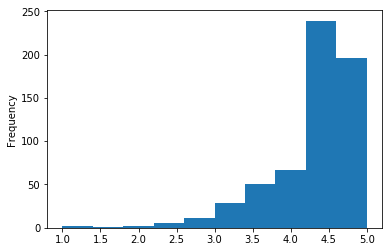

In [44]:
data2['Rating'].plot.hist()

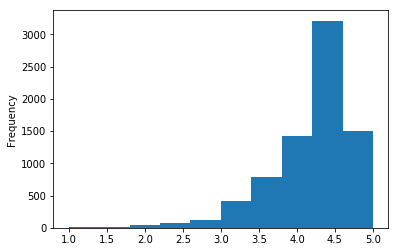

In [47]:
data3['Rating'].plot.hist()

In [18]:
data['Price_dollars'].describe()

count    9659.000000
mean        1.097231
std        16.851618
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price_dollars, dtype: float64

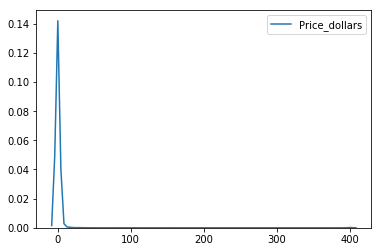

In [25]:
from seaborn import kdeplot
kdeplot(data.Price_dollars)